In [0]:
%%capture
!pip install transformers
!git clone https://github.com/someshsingh22/FlaiReddit-MIDAS
%cd FlaiReddit-MIDAS
!wget https://www.kaggleusercontent.com/kf/31655789/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..eezhQjnYsLNPiZTZKjf6CQ.r7bWGbsXPatYWsRc3o4hohwzPAocysC0iDcy8Ea_yoQwomqwsxuUeF0qKpz8GRQ3E3QihBgoK5EISDYOicUDhJJ_mVMn7uVzBHL8d7KKP1YYOHGG8e1p44NWcVgLRdZAMJXb_OLBtnnNQ4f5O3mW3jeFq4ueVXy8yCvdnr28SSS-BTOthdg0n_dRRNw0WgoZ3qrdA7qUESORGFVHCF93reefagd02hvsp7HJtc632PPyyEkFE4EEyNutD-HyjWHfXk2G5mncc3mVXN7PbAQ_gNM9Ni-HG3SPDyEIp5LyoHbDROZw1XSkSqBdBjd6OOtVihfJZoTXppPnEYnj7mjRG3kXEguH_UNYR4QxoDDxnN9xPbAc-E6vX38u54rfneido2mo_4WKr05k6F-Ii2CCzW3pYUbAhHZZqaib0EFw01d30hPXARmlgg8qHDVGShnnhnCTbACVOp8UoXezx1nB9k5iBgj4lnMmjU3RruWuX9MWwVEcKiPt0YVXYbY1yWBFUKAv2DQIY6_lBBuCFfVsIDhhVz3irkCOT86b4LArcCM8_sqRaJR6BpuZ2xbr4v5y2fm3qGiRkgRfu41GuIiXi_p9UunPOCzBCkj8ZKS9-ScYetPVm5oRFE6gSiiCie_nfEJL4w6V96sNkH8hehCAXyDaWxuo6QoqCsq7fNfTRxY.MSrE3B-xUB5E70-kyuqtYg/raw_data.csv

from modules.crawler import * #for all imports
import re #for data exploration and cleaning
from collections import Counter #Frequency Calc
import string #String Lib
from scipy import sparse #Sparsed Vectorizers
import scipy.stats as ss 
from wordcloud import WordCloud ,STOPWORDS #WordClouds

#Basic NLP
import nltk 
from nltk.corpus import stopwords
import warnings
from textblob import TextBlob

#Vectorizers
from sklearn.feature_extraction.text import CountVectorizer as CV
from sklearn.feature_extraction.text import TfidfVectorizer as TF

#MNB Classifier Modelling
from sklearn.naive_bayes import MultinomialNB as MNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import resample
import numpy as np
from scipy.sparse import hstack
from scipy import sparse

#Settings
nltk.download('stopwords')
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")
%matplotlib inline

raw_df=pd.read_csv(open('raw_data.csv'), encoding='utf-8').dropna() #Replace with data/raw_data.csv in offline mode

In [5]:
#@title
counter=Counter(raw_df['Flair'])
flair, freq = [],[]
for k,v in counter.items():
  flair.append(k)
  freq.append(v)
print(counter)
raw_df=raw_df[raw_df['Text'].apply(lambda x : x.count('[removed]')) == 0]
raw_df['Flair'].replace('Science &amp; Technology', 'Science/Technology', inplace=True)
raw_df['Flair'].replace('Technology', 'Science/Technology', inplace=True)
raw_df['Flair'].replace('Policy &amp; Economy', 'Policy/Econonmy', inplace=True)
raw_df['Flair'].replace('Business &amp; Finance', 'Business/Finance', inplace=True)
raw_df['Flair'].replace('Non-Political ', 'Non-Political', inplace=True)
raw_df['Flair'].replace('Askindia', 'AskIndia', inplace=True)
raw_df=raw_df[raw_df['Flair'].apply(lambda x : counter[x])>1000]
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.preprocessing import LabelEncoder as LE
from transformers import *

Counter({'Non-Political': 35681, 'AskIndia': 33888, 'Politics': 13411, '[R]eddiquette': 5086, 'Scheduled': 1658, 'Policy/Economy': 1517, 'Science/Technology': 1402, 'Business/Finance': 1167, 'Coronavirus': 957, 'Demonetization': 756, 'Food': 587, 'Sports': 561, 'Net Neutrality': 438, 'Technology': 386, 'Policy': 353, 'Entertainment': 335, 'Science &amp; Technology': 253, 'AMA': 230, 'Photography': 135, 'Unverified': 128, 'CAA-NRC': 114, 'Askindia': 97, 'Moderated': 95, 'Casual': 73, 'Policy &amp; Economy': 55, 'Business &amp; Finance': 37, 'Misleading': 26, 'Governance': 24, 'Reddiquette Enforced': 24, 'Casual AMA': 22, 'Low-effort self-post.': 14, 'AMA Announcement': 5, '[Unverified]': 3, '[NSFNRI]': 3, 'Meta': 2, 'CAA-NRC-NPR': 2, 'Announcement': 2, 'Low-effort Self Post.': 2, 'Unverified Content.': 2, 'Megathread': 2, 'Cultural Exchange': 2, 'Repost.': 2, 'ಠ_ಠ': 2, 'Removed: Low-effort self-post': 2, '( ͡° ͜ʖ ͡°)': 2, '[OLD]': 2, '[Important!]': 2, 'Verified': 1, 'PARTAYYY AGAIN :D'

Using TensorFlow backend.


In [6]:
Counter(raw_df['Flair'])

Counter({'AskIndia': 33966,
         'Business/Finance': 1204,
         'Non-Political': 35677,
         'Policy/Economy': 1517,
         'Politics': 13407,
         'Scheduled': 1657,
         'Science/Technology': 2041,
         '[R]eddiquette': 5085})

In [0]:
contracts={
  "n't" : " not",
  "'ll" : "will",
  "'ve" : "have",
  "'n" : "",
  "'ed" : "",
  "'l" : "will",
  "'re" : "are",
  "'r" : "are",
  "'a" : " is a",
  "'d" : "had",
  "'ing" : "ing",
  "r\/" : " subreddit ",
  "u\/" : " user ",
  "&amp;" : " ",
  "&gt;" : " ",
  "&lt;" : " ",}
def clean(text):
  text=text.lower()
  text=text.replace('\n', ' ')
  for k,v in contracts.items():
    text=text.replace(k,v)
  text=re.sub('[(]?http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F])/)*', ' ', text)
  text=re.sub('[^a-z0-9]'.format(string.punctuation), ' ', text)
  text=' '.join([word for word in text.split(' ') if not word== ''])
  return text
raw_df['Text']=raw_df['Text'].apply(lambda x : clean(x))
raw_df['Title']=raw_df['Title'].apply(lambda x : clean(x))
raw_df=raw_df[raw_df['Title'].str.len()>10]
raw_df=raw_df[raw_df['Text'].str.len()>10]
raw_df=raw_df[raw_df['Text'].str.len()<1500]

In [0]:
raw_df['data']=raw_df['Title']+ ' ' +raw_df['Text']

In [9]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P4


In [0]:
le=LE()
raw_df['Flair']=le.fit_transform(raw_df['Flair'])

In [11]:
Counter(raw_df['Flair'])

Counter({0: 31932,
         1: 1038,
         2: 31295,
         3: 1143,
         4: 11139,
         5: 1500,
         6: 1772,
         7: 4290})

In [0]:
data=pd.concat([raw_df[raw_df['Flair']==i].sample(1038) for i in range(8)])

In [13]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
input_ids = []
# For every sentence...
for sent in data.data:
    encoded_sent = tokenizer.encode(sent,add_special_tokens = True)
    # Add the encoded sentence to the list.
    input_ids.append(encoded_sent)
data['Tok']=input_ids
data['len']=data['Tok'].apply(lambda x : len(x))

attention_masks = []
input_ids=pad_sequences(data.Tok.values, maxlen=256, dtype="long",value=0, truncating="post", padding="post")
for sent in input_ids:
    att_mask = [int(token_id > 0) for token_id in sent]
    attention_masks.append(att_mask)

inputs = torch.tensor(input_ids)
labels = torch.tensor(data['Flair'].values)
masks = torch.tensor(attention_masks)
inputs.shape, labels.shape, masks.shape

# Create the DataLoader for our training set.
Data = TensorDataset(inputs, masks, labels)

In [0]:
train_data, valid_data = train_test_split(Data, stratify=data['Flair'])

In [0]:
batch_size=16
train_sampler = SequentialSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
valid_sampler = SequentialSampler(valid_data)
valid_dataloader = DataLoader(valid_data, sampler=valid_sampler, batch_size=batch_size)

In [16]:
from transformers import BertForSequenceClassification, AdamW, BertConfig
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels = 8, output_attentions = False, output_hidden_states = False)
model.cuda()
condition = lambda name : True if 'classifier' in name or 'pooler' in name or '11' in name or '10' in name else False #

for name, param in model.named_parameters():
  param.requires_grad=condition(name)
  print(name, param.requires_grad)

optimizer = AdamW(model.parameters(), lr = 2e-5)


bert.embeddings.word_embeddings.weight False
bert.embeddings.position_embeddings.weight False
bert.embeddings.token_type_embeddings.weight False
bert.embeddings.LayerNorm.weight False
bert.embeddings.LayerNorm.bias False
bert.encoder.layer.0.attention.self.query.weight False
bert.encoder.layer.0.attention.self.query.bias False
bert.encoder.layer.0.attention.self.key.weight False
bert.encoder.layer.0.attention.self.key.bias False
bert.encoder.layer.0.attention.self.value.weight False
bert.encoder.layer.0.attention.self.value.bias False
bert.encoder.layer.0.attention.output.dense.weight False
bert.encoder.layer.0.attention.output.dense.bias False
bert.encoder.layer.0.attention.output.LayerNorm.weight False
bert.encoder.layer.0.attention.output.LayerNorm.bias False
bert.encoder.layer.0.intermediate.dense.weight False
bert.encoder.layer.0.intermediate.dense.bias False
bert.encoder.layer.0.output.dense.weight False
bert.encoder.layer.0.output.dense.bias False
bert.encoder.layer.0.output.La

In [0]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 7

# Total number of training steps is number of batches * number of epochs.
#total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
#scheduler = get_linear_schedule_with_warmup(optimizer,  num_warmup_steps = 0, num_training_steps = total_steps)
#scheduler

In [0]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)


In [0]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [20]:
import random
# Set the seed value all over the place to make this reproducible.
seed_val = 1234

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []
# For each epoch...
for epoch_i in range(0, epochs):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')
    t0 = time.time()
    total_loss = 0
    model.train()
    for step, batch in enumerate(train_dataloader):
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        model.zero_grad()        
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask,  labels=b_labels)
        loss = outputs[0]
        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        #scheduler.step()
    avg_train_loss = total_loss / len(train_dataloader)            
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.4f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
    print("")
    print("Running Validation...")

    t0 = time.time()
    model.eval()
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    preds, labels =[],[]
    for batch in valid_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        with torch.no_grad():        
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        logits = outputs[0]
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1
        
        preds.extend(list( np.argmax(logits, axis=1).flatten() ))
        labels.extend(list(label_ids.flatten()))

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.4f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))
    print(classification_report(labels, preds))

print("")
print("Training complete!")


======== Epoch 1 / 7 ========
Training...
  Batch    40  of    390.    Elapsed: 0:00:14.
  Batch    80  of    390.    Elapsed: 0:00:28.
  Batch   120  of    390.    Elapsed: 0:00:42.
  Batch   160  of    390.    Elapsed: 0:00:57.
  Batch   200  of    390.    Elapsed: 0:01:11.
  Batch   240  of    390.    Elapsed: 0:01:25.
  Batch   280  of    390.    Elapsed: 0:01:39.
  Batch   320  of    390.    Elapsed: 0:01:54.
  Batch   360  of    390.    Elapsed: 0:02:08.

  Average training loss: 1.5506
  Training epcoh took: 0:02:19

Running Validation...
  Accuracy: 0.5272
  Validation took: 0:00:35
              precision    recall  f1-score   support

           0       0.39      0.41      0.40       260
           1       0.54      0.65      0.59       260
           2       0.32      0.14      0.19       259
           3       0.48      0.57      0.52       260
           4       0.61      0.66      0.63       259
           5       0.83      0.96      0.89       260
           6       0.4

In [0]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

model.eval()
preds, labels =[],[]
for batch in valid_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    with torch.no_grad():        
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    
    preds.extend(list( np.argmax(logits, axis=1).flatten() ))
    labels.extend(list(label_ids.flatten()))

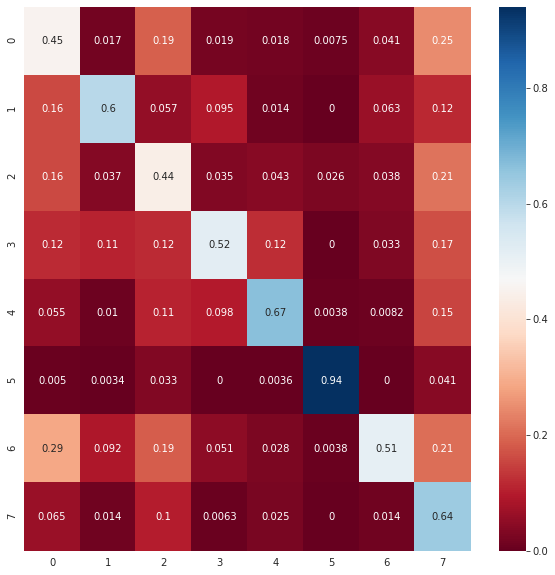

In [25]:
C = confusion_matrix(preds, labels)
C = C / C.astype(np.float).sum(axis=1)
plt.figure(figsize = (10,10))
sn.heatmap(C, cmap='RdBu', annot=True)

In [0]:
torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            }, "./RedditBERT.pt")